In [1]:
file = open('adult.data', 'r')

In [2]:
def chr_int(a):
    if a.isdigit():
        return int(a)
    else:
        return 0
                
data=[]
for line in file:
     data1=line.split(', ')
     if len(data1)==15:
        data.append([chr_int(data1[0]),data1[1],chr_int(data1[2]),data1[3],chr_int(data1[4]),data1[5],data1[6],\
            data1[7],data1[8],data1[9],chr_int(data1[10]),chr_int(data1[11]),chr_int(data1[12]),data1[13],\
            data1[14]])

In [3]:
print data[1:2]

[[50, 'Self-emp-not-inc', 83311, 'Bachelors', 13, 'Married-civ-spouse', 'Exec-managerial', 'Husband', 'White', 'Male', 0, 0, 13, 'United-States', '<=50K\n']]


In [4]:
%matplotlib inline
import pandas as pd

df = pd.DataFrame(data) #  Two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes 

df.columns = ['age', 'type_employer', 'fnlwgt', 'education', 
                "education_num","marital", "occupation", "relationship", "race","sex",
                "capital_gain", "capital_loss", "hr_per_week","country","income"]
df.head()


,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K\n
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K\n
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K\n
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K\n
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K\n


In [5]:
ml = df[(df.sex == 'Male')] # grouping by sex
ml.shape

(21790, 15)

In [6]:
ml1 = df[(df.sex == 'Male')&(df.income=='>50K\n')]
ml1.shape

(6662, 15)

In [7]:
fm =df[(df.sex == 'Female')]
fm.shape

(10771, 15)

In [8]:
fm1 =df[(df.sex == 'Female')&(df.income=='>50K\n')]
fm1.shape

(1179, 15)

Calculating mean, standard deviation and variance using numpy

In [9]:
import numpy as np
average_age_men = np.mean(ml['age'])
print average_age_men

39.4335474989


In [10]:
std_age_men = np.std(ml['age'])
print std_age_men

13.3703233824


In [11]:
var_age_men = np.var(ml['age'])
print var_age_men

178.765547351


In [12]:
median_age_men = np.median(ml['age'])
print median_age_men

38.0


In [13]:
upper_quartile_age_men = np.percentile(ml['age'],75)
print upper_quartile_age_men

48.0


In [14]:
lower_quartile_age_men = np.percentile(ml['age'],25)
print lower_quartile_age_men

29.0


In [15]:
iqr_age_men = upper_quartile_age_men - lower_quartile_age_men
print iqr_age_men

19.0


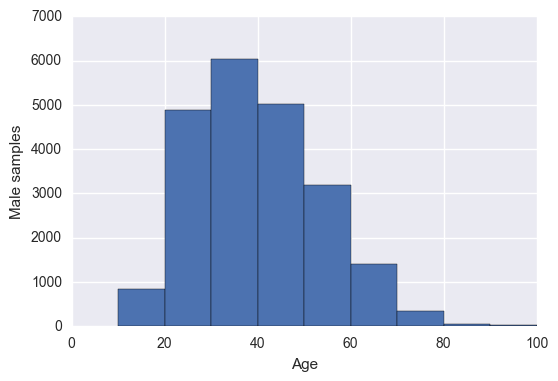

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
bin_edges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
_ = plt.hist(ml['age'], bins = bin_edges)
_ = plt.xlabel('Age')
_ = plt.ylabel('Male samples')
plt.show()

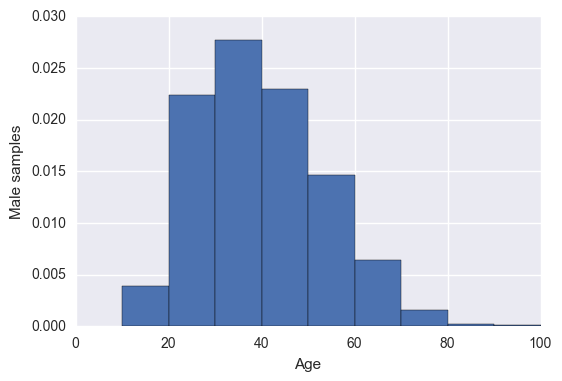

In [17]:
import matplotlib.pyplot as plt
bin_edges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
_ = plt.hist(ml['age'], bins=bin_edges, normed = 1)
_ = plt.xlabel('Age')
_ = plt.ylabel('Male samples')
plt.show()

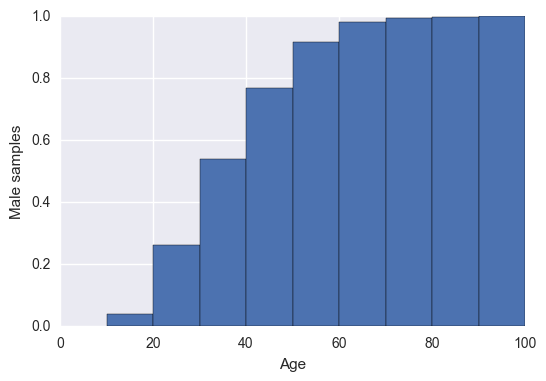

In [18]:
_ = plt.hist(ml['age'], bins=bin_edges, cumulative=True, normed = 1)
_ = plt.xlabel('Age')
_ = plt.ylabel('Male samples')
plt.show()

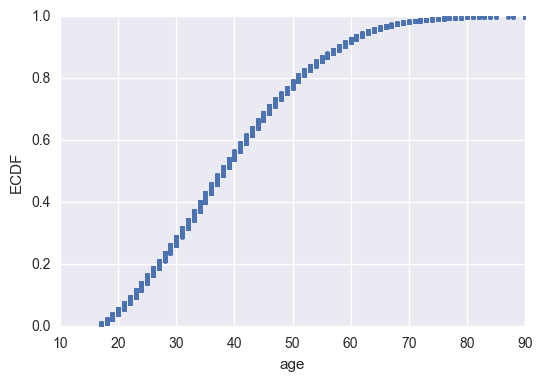

In [19]:
x = np.sort (ml['age'])
y = np.arange(1.0, len(x)+1)/len(x)
_ = plt.plot(x, y, marker = '.', linestyle = 'none')
_ = plt.xlabel ('age')
_ = plt.ylabel ('ECDF')
plt.show()

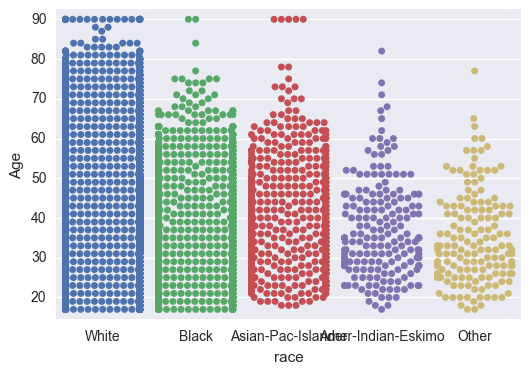

In [20]:
import seaborn as sns
sns.set()
_ = sns.swarmplot(x= 'race', y = 'age', data = ml)
_ = plt.margins(0.02)
_ = plt.xlabel ('race')
_ = plt.ylabel ('Age')
plt.show()

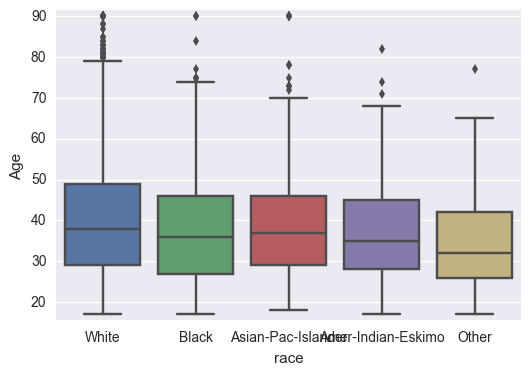

In [21]:
import seaborn as sns
sns.set()
_ = sns.boxplot(x = 'race', y = 'age', data = ml)
_ = plt.margins(0.02)
_ = plt.xlabel ('race')
_ = plt.ylabel ('Age')
plt.show()

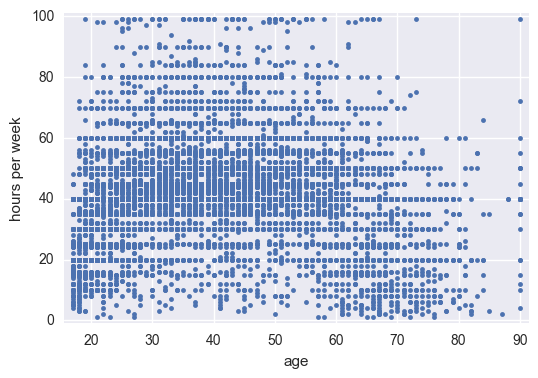

In [22]:
_ = plt.plot(ml['age'], ml['hr_per_week'], marker = '.', linestyle = 'none')
_ = plt.margins(0.02)
_ = plt.xlabel ('age')
_ = plt.ylabel ('hours per week')
plt.show()

In [23]:
batsman = pd.read_excel('batsman.xlsx')
batsman.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Start Date
1,5,10,8,0,0,62.50,1,caught,1,2007-02-09
2,30,40,32,3,2,93.75,1,caught,2,2007-02-10
3,7,27,20,1,0,35.00,2,run out,2,2007-04-19
4,45,81,53,6,0,84.90,2,caught,1,2007-05-10
5,7,22,12,1,0,58.33,2,run out,2,2007-05-12


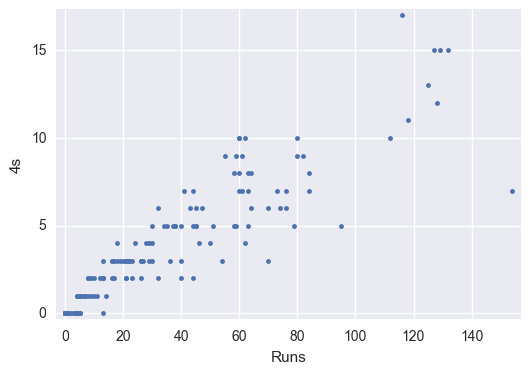

In [24]:
_ = plt.plot(batsman['Runs'], batsman['4s'], marker = '.', linestyle = 'none')
_ = plt.margins(0.02)
_ = plt.xlabel ('Runs')
_ = plt.ylabel ('4s')
plt.show()

In [25]:
covariance_matrix = np.cov(ml['hr_per_week'],ml['age'])
print covariance_matrix
print "Covariance = ", covariance_matrix [0][1]

[[ 146.88846717    5.5298026 ]
 [   5.5298026   178.77375175]]
Covariance =  5.52980260364


In [26]:
pearson_coefficient = np.corrcoef(ml['hr_per_week'],ml['age'])
print pearson_coefficient
print "Pearson's correlation coefficient = " , pearson_coefficient [0][1]

[[ 1.          0.03412431]
 [ 0.03412431  1.        ]]
Pearson's correlation coefficient =  0.0341243118412


In [27]:
covariance_matrix1 = np.cov(batsman['Runs'], batsman['4s'])
print covariance_matrix1
print "Covariance between runs and 4s= ", covariance_matrix1 [0][1]

[[ 1169.20642119   112.07718121]
 [  112.07718121    13.16724107]]
Covariance between runs and 4s=  112.077181208


In [28]:
pearson_coefficient1 = np.corrcoef(batsman['Runs'], batsman['4s'])
print pearson_coefficient1
print "Pearson correleation coefficient between runs and 4s= ", pearson_coefficient1 [0][1]

[[ 1.          0.90328378]
 [ 0.90328378  1.        ]]
Pearson correleation coefficient between runs and 4s=  0.90328377718
